In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL.Image import module

In [3]:
df = pd.read_csv('data/advertising.csv')
X = df.drop('Sales', axis=1).values
y = df['Sales'].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)

(160, 3)


[15.21069877  4.66839933  1.49465477  0.09396484]


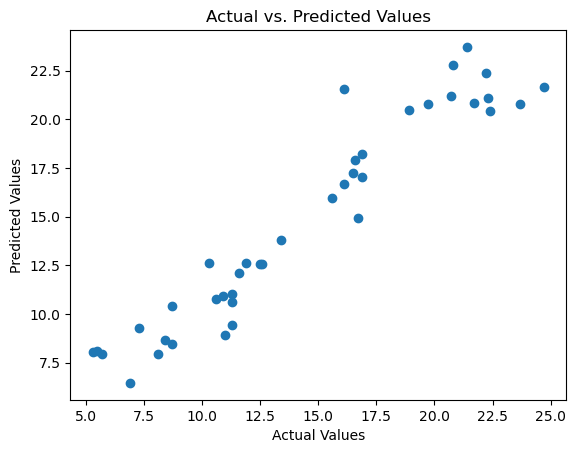

R2-Score 0.9058863740076244


In [4]:
import models
Linear = models.LinearRegression(learning_rate=0.01, epochs=1000)
Linear.fit_shuffle(X_train, y_train)

from sklearn.metrics import r2_score

y_pred = Linear.predict(X_test)

print(Linear.weights)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

print("R2-Score", r2_score(y_test, y_pred))

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error , r2_score

model = LinearRegression ()
scores = cross_val_score (model ,X ,y , cv=5 ,scoring='neg_mean_squared_error')

rmse = np.sqrt(-scores)
print(f'RMSE:{np.mean(rmse)}')

scores = cross_val_score(model ,X ,y , cv=5 ,scoring='neg_mean_absolute_error')

mae = -scores
print(f'MAE: {np.mean(mae)}')

scores = cross_val_score ( model ,X ,y , cv=5 , scoring='r2')
r2 = scores
print (f'R2: {np.mean(r2)}')

RMSE:1.6657702460059216
MAE: 1.2683048324460453
R2: 0.8953723525274103


In [9]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, epochs=1000, bias=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = bias

    def predict(self, X):
        if X.shape[1] != self.weights.shape[0]:
            X = np.column_stack([np.ones(X.shape[0]), X])

        return X @ self.weights

    def loss_function(self, y_true, y_pred):
        n = y_true.shape[0]
        return (1.0 / n) * (((y_true - y_pred) ** 2).sum())

    def gradient(self, X, y):
        y_pred = self.predict(X)
        error = y - y_pred
        grad = (-2.0 / X.shape[0]) * (X.T @ error)
        return grad

    def fit(self, X, y):
        if self.bias:
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.weights = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            grad = self.gradient(X, y)
            self.weights -= self.learning_rate * grad

    def score(self, X, y):
        y_pred = self.predict(X)
        return 1 - (((y_pred - y) ** 2).sum()) / (((y - y_test.mean()) ** 2).sum())

# Ví dụ sử dụng với cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Khởi tạo mô hình
model = LinearRegression(learning_rate=0.01, epochs=1000, bias=True)

# Thực hiện K-fold Cross Validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Kết quả
print(f"R² trung bình: {np.mean(scores):.4f}")
print(f"Độ lệch chuẩn: {np.std(scores):.4f}")
print(f"Các giá trị R² từng fold: {scores}")

R² trung bình: 0.8954
Độ lệch chuẩn: 0.0314
Các giá trị R² từng fold: [0.87556266 0.93177792 0.92150401 0.84554594 0.9024713 ]
